In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import chardet

In [10]:
# Manipulação do dataframe
df = pd.read_csv('datasets/fuel.csv', encoding='utf-16', sep='\t')

In [15]:
df['Valor de Venda'] = df['Valor de Venda'].apply(lambda x: float(str(x).replace(',', '.')))
df['Valor de Compra'] = df['Valor de Compra'].apply(lambda x: float(str(x).replace(',', '.')))

In [16]:
fuel = pd.DataFrame()
for state in list(df["Estado - Sigla"].unique()):
    for product in list(df["Produto"].unique()):
        price = df[(df["Estado - Sigla"] == state) & (df["Produto"] == product)]["Valor de Venda"].mean()
        fuel = fuel.append(pd.DataFrame({'Estado':state , 'Produto':product , 'Valor de Venda':price}, index=[0]))
fuel = fuel.reset_index()
del fuel['index']
fuel["Valor de Venda"].fillna(0,inplace=True) # preenche valores null com 0
fuel["Valor de Venda"].isnull().value_counts() 
fuel["Valor de Venda"] = fuel["Valor de Venda"].astype(float)
fuel.head()

,Estado,Produto,Valor de Venda
0,DF,DIESEL,3.704437
1,DF,DIESEL S10,3.833805
2,DF,ETANOL,3.276517
3,DF,GASOLINA,4.275471
4,DF,GNV,3.279250


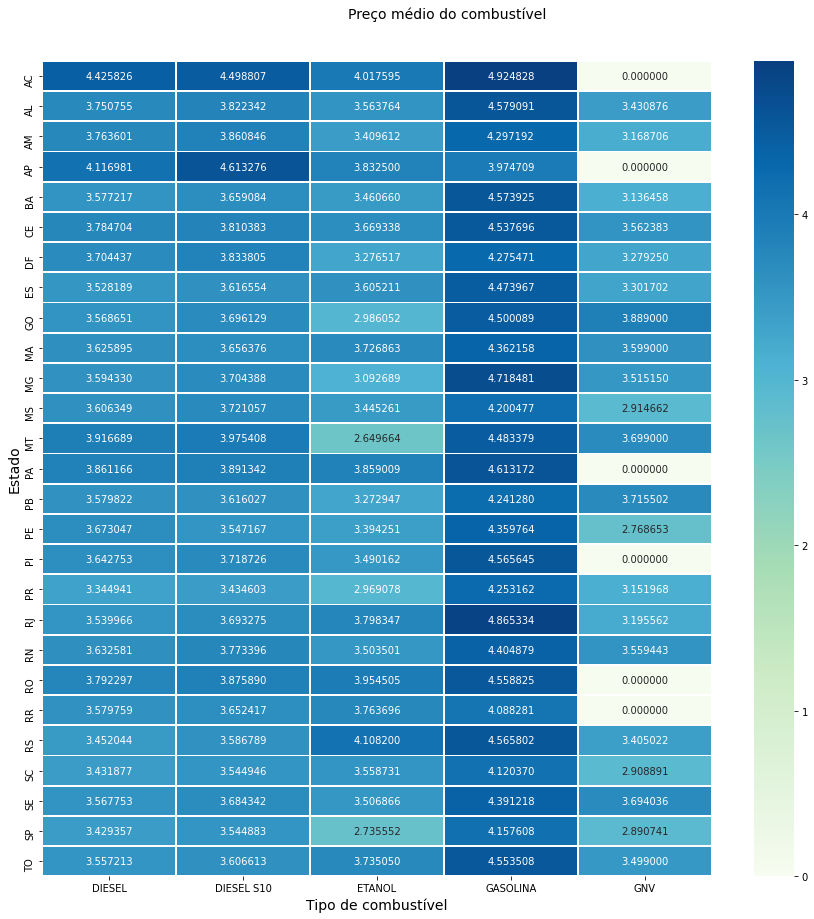

In [30]:
gas = fuel.pivot("Estado", "Produto", "Valor de Venda")
fig, ax = plt.subplots(figsize=(15,15))
sea.heatmap(gas, linewidths=1, cmap="GnBu", annot=True, ax=ax, fmt="f")
title = plt.figtext(.5,.9,'Preço médio do combustível', fontsize=14, ha='center')
title.set_position([.5, 0.92])
ax.xaxis.set_label_text("Tipo de combustível",fontdict= {'size':14})
ax.yaxis.set_label_text("Estado",fontdict= {'size':14})
plt.show()

In [12]:
fig.savefig("fuel.png")